In [2]:
import numpy as np
import MDAnalysis as mda
import importlib
import XS_calc
from XS_calc import *

In [12]:
importlib.reload(XS_calc) # This reloads XS_calc
from XS_calc import *     # This updates the functions in XS_calc

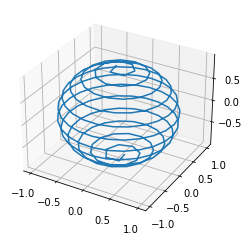

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
r = raster_unit_sphere(200)  # This is to check the unit sphere
ax.plot3D(r[:,0], r[:,1], r[:,2],'-')


In [14]:
# This would be a typical use case
U = mda.Universe('data/Ala10.pdb')
traj = Trajectory(U, selection='protein')
env = Environment(num_raster=200)
mea = Measurement(q = np.linspace(0.03, 0.8, num=200))
# XS = traj_calc(traj, env, mea)

# Do something with XS. E.g. fitting etc.


The protein has 104 atoms


In [15]:
import time
t0 = time.time()
traj.Frames[0].neighbor_calc()
t1 = time.time()
print(f'{(t1-t0)*1000:.3f} ms')

2.304 ms


In [16]:
import time
t0 = time.time()
traj.Frames[0].spatial_decomposition()
traj.Frames[0].neighbor_calc_sd()
t1 = time.time()
print(f'{(t1-t0)*1000:.3f} ms')
# np.min(traj.Frames[0].xyz, axis=0)

8.992 ms


In [17]:
import time
t0 = time.time()
traj.Frames[0].SASA_calc(env,  force_recalc=True)
t1 = time.time()
print(f'{(t1-t0)*1000:.3f} ms')
print(f'{traj.Frames[0].SASA_A2} A^2')

27.800 ms
1134.8614280595195 A^2


In [18]:
# x = list(range(20, 510, 2))
# y = []
# t = []
# for i in x:
#     t0 = time.time()

#     print(i, end=' ')
#     env = Environment(num_raster=i)
#     traj.Frames[0].SASA_calc(env,  force_recalc=True)
#     y.append(traj.Frames[0].SASA_A2)
#     t1 = time.time()
#     t.append(t1-t0)

In [21]:
importlib.reload(XS_calc) # This reloads XS_calc
from XS_calc import *     # This updates the functions in XS_calc
U = mda.Universe('data/Ala10.pdb')
traj = Trajectory(U, selection='protein')
mea = Measurement(q = np.linspace(0.00, 0.500, num=501))
env = Environment(num_raster=200, c1=1.00, c2=0.00)
traj.Frames[0].SASA_calc(env,  force_recalc=True)
FF_q = FF_calc(traj.Frames[0], env, mea)
for i in range(20):
    if traj.Molecule.elements[i] == 'O':
        print(traj.Molecule.elements[i], FF_q[i][:20])
# print('Water:', fw[:50])

The protein has 104 atoms
O [4.92598013 4.92597987 4.92597911 4.92597783 4.92597605 4.92597375
 4.92597095 4.92596763 4.92596381 4.92595947 4.92595463 4.92594928
 4.92594341 4.92593704 4.92593015 4.92592276 4.92591486 4.92590644
 4.92589752 4.92588809]


In [22]:
traj.Frames[0].SASA_A2

1134.8614280595195

In [ ]:
# traj.Frames[0].SASA_calc_output_dots(env,  force_recalc=True)

In [ ]:
sel = U.select_atoms('protein')

In [ ]:
sel.positions

In [ ]:
sel.atoms.elements